## About the dataset:

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species

## Goal of this project:


The main goal of this project is find out which classification model works best for this dataset. 

Our target variable is species.

I will be using the following Classification Techniques:
    1. Logistic Regression
    2. K nearest neighbors 
    3. Desicison tree

### Importing Libraries

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

### Loading the dataset and understanding it

In [2]:
df = pd.read_csv('Iris.csv')
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [3]:
print('The number of rows is ',df.shape[0],' and colums is ',df.shape[1])

The number of rows is  150  and colums is  6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


There is no missing values in the dataset.

In [5]:
df = df.drop('Id',axis = 1)

In [6]:
df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


Since Id is not required for the analysis, we drop Id column.

In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We can find the basic details of all the numerical columns here.

In [9]:
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

The dataset is Balanced as each of the categories in Species have equal number of samples.

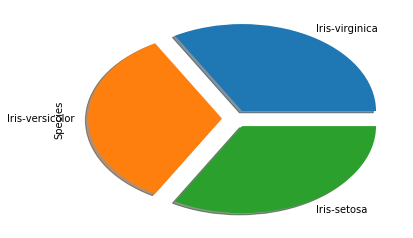

In [44]:
df.Species.value_counts().plot.pie(explode=[0.1,0.1,0.1],shadow = True)
plt.show()

In [11]:
num_cols = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

### Exploratory Data Analysis

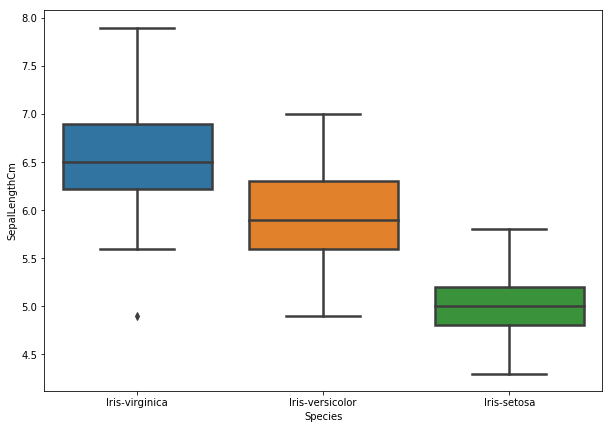

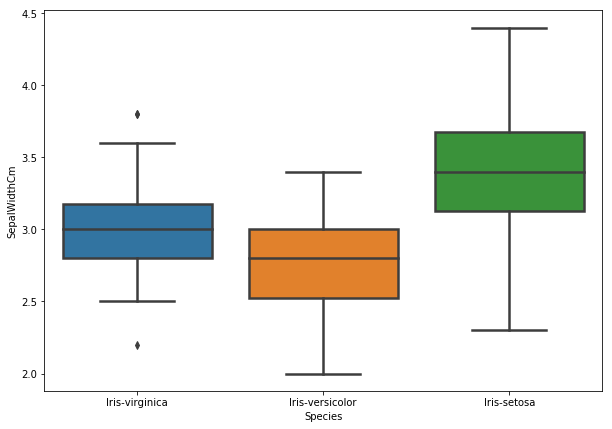

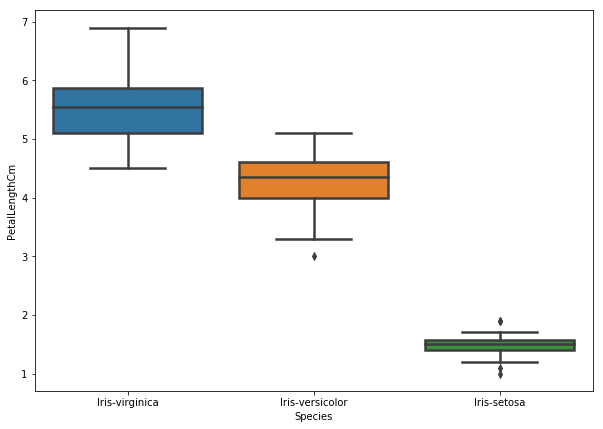

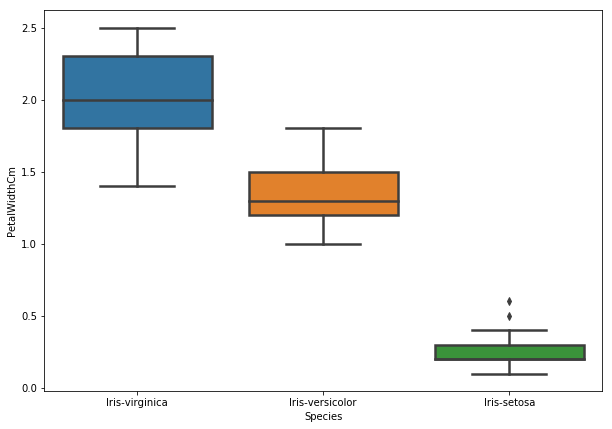

In [22]:
for i in num_cols:
    fig=plt.gcf()
    fig.set_size_inches(10,7)
    fig=sns.boxplot(x='Species',y= i,data=df,order=['Iris-virginica','Iris-versicolor','Iris-setosa'],linewidth=2.5,orient='v',dodge=False)
    plt.show()

From the box plots we can see that how different each species is and how we can easily classifiy using the other features.

We can see the following:
    
    SepalLengthCm - virginica > versicolor > setosa
    SepalWidtCm - virginica > versicolor < setosa
    PetalLengthCm - virginica > versicolor > setosa
    PetalWidthCm - virginica > versicolor > setosa
    
We can also observe a few outliers.

<Figure size 720x576 with 0 Axes>

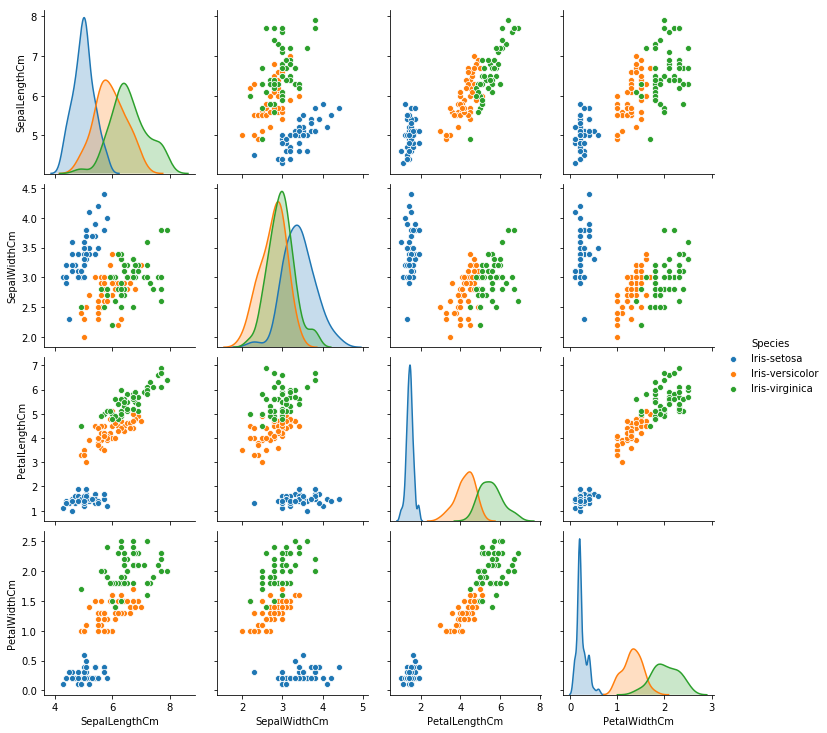

In [35]:
plt.figure(figsize=(10,8))
sns.pairplot(df,hue='Species')
plt.show()

Pairplot helps us visualize the distribution of the data.

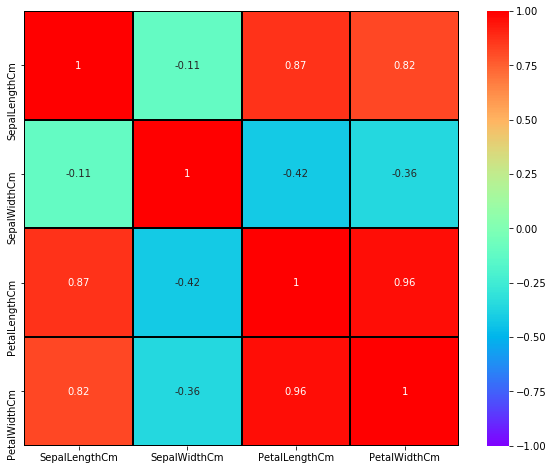

In [41]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='rainbow',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar=True)
plt.show()

This heatmap shows us how well the features are correlated.

 - PetalWidthCm and SepalLengthCm is high correlated - +0.82
 - PetalLengthCm and PetalWidthCm is high correlated - +0.96
 - PetalLengthCm and SepalLengthCm is high correlated - +0.87

### Converting Categorical to Numerical

In [45]:
y = df.Species
X = df.drop('Species',axis = 1)

In [48]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

Since Species was a categorical column, We have to convert to numerical data by using Label encoder or One hot encoder.

I have used Label encoder 

### Splitting Data for train and test

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [53]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Transforming data so its distribution will have a mean value 0 and standard deviation of 1.

### Creating models

In [112]:
model1 = LogisticRegression(random_state=42)
model2 = KNeighborsClassifier()
model3 = DecisionTreeClassifier(random_state=42)

### Fitting the models

In [113]:
model1.fit(X_train,y_train)

C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [114]:
model2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [115]:
model3.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

### Predicting and Performance metrics

#### Logistic Regression

In [116]:
y_pred_log = model1.predict(X_test)

In [123]:
print('Acurracy of train ',(model1.score(X_train, y_train)*100))
print('Acurracy of test ',(accuracy_score(y_test, y_pred_log)*100))
cm1 = confusion_matrix(y_test, y_pred_log)

Acurracy of train  88.57142857142857
Acurracy of test  91.11111111111111


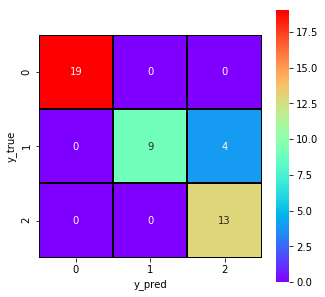

In [133]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm1,annot = True,cmap='rainbow',linewidths=1,linecolor='k',square=True,mask=False,fmt = ".0f",cbar=True,ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### K Nearest Neighbor

In [118]:
y_pred_knn = model2.predict(X_test)

In [125]:
print('Acurracy of train ',(model2.score(X_train, y_train)*100))
print('Acurracy of test ',(accuracy_score(y_test, y_pred_knn)*100))
cm2 = confusion_matrix(y_test, y_pred_knn)

Acurracy of train  95.23809523809523
Acurracy of test  100.0


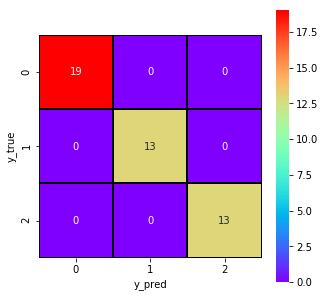

In [135]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm2,annot = True,cmap='rainbow',linewidths=1,linecolor='k',square=True,mask=False,fmt = ".0f",cbar=True,ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Decision Tree

In [120]:
y_pred_dt = model3.predict(X_test)

In [127]:
print('Acurracy of train ',(model3.score(X_train, y_train)*100))
print('Acurracy of test ',(accuracy_score(y_test, y_pred_dt)*100))
cm3 = confusion_matrix(y_test, y_pred_dt)

Acurracy of train  100.0
Acurracy of test  100.0


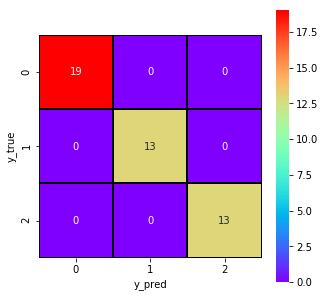

In [137]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm3,annot = True,cmap='rainbow',linewidths=1,linecolor='k',square=True,mask=False, fmt = ".0f",cbar=True,ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### Conclusion

The Decision Tree is the better performing model than Logistic Regression and KNN.

Why so? 

Because:
    
    Logistic Regression misclassifies some samples.
    KNN underfits the model.
 
Since it is a small and clean data set Tree based algorithmns have no problems in classifying the data.

Tunning the hyper parameters using GridSearch technique can help us improve the logistic regression and the KNN model.